# KNN Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [3]:
# Read data
X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv').values.ravel()

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2111, 23), y shape: (2111,)


### Thực hiện trên tệp dữ liệu đã chuẩn hóa


In [4]:
# 4:1
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# 7:3
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(X, y, test_size=0.3, random_state=42)

# 6:4
X_train_6_4, X_test_6_4, y_train_6_4, y_test_6_4 = train_test_split(X, y, test_size=0.4, random_state=42)


In [5]:
# Standardize data for each split
scaler = StandardScaler()

X_train_4_1 = scaler.fit_transform(X_train_4_1)
X_test_4_1 = scaler.transform(X_test_4_1)

X_train_7_3 = scaler.fit_transform(X_train_7_3)
X_test_7_3 = scaler.transform(X_test_7_3)

X_train_6_4 = scaler.fit_transform(X_train_6_4)
X_test_6_4 = scaler.transform(X_test_6_4)


[0.8264446122241147, 0.8151967411725458, 0.8080821027865083, 0.7980106403525713, 0.7908960019665339, 0.7766825276982775, 0.7695766684810283, 0.7654293891454358, 0.7547662107351676, 0.7506171755658174, 0.7470616122065563, 0.749431987779397, 0.7435078046810528, 0.7435078046810528, 0.7369989289414078, 0.7328516496058153, 0.7298878022228855, 0.7304865415342476, 0.7239688866258143, 0.7239636191245413]
K optimal value: 2, Accuracy: 0.8264446122241147


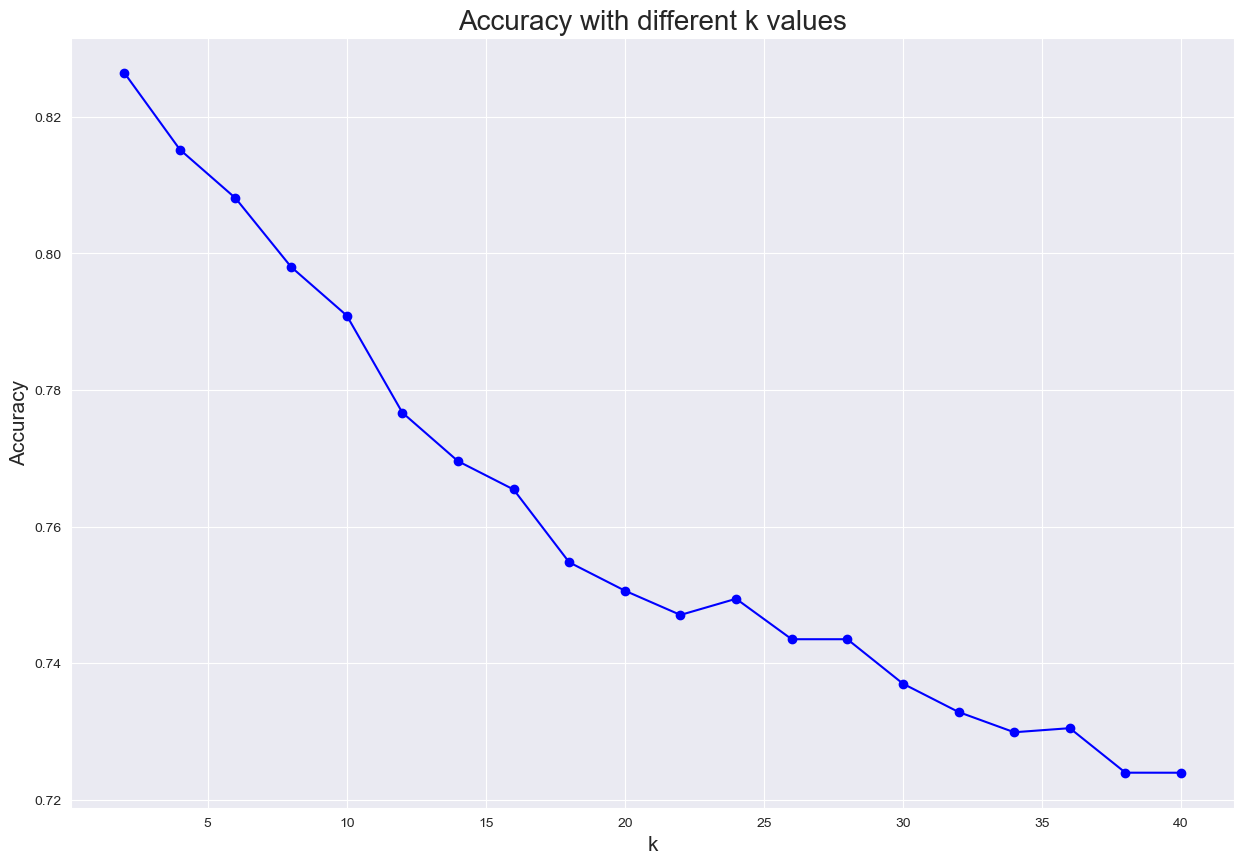

In [6]:
# Find k optimal value using k-fold cross validation
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 

k_values = range(2, int(math.sqrt(len(X_train_4_1))), 2) 
kf = KFold(n_splits=5)  
mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X_train_4_1):
        X_train, X_test = X_train_4_1[train_index], X_train_4_1[test_index]
        y_train, y_test = y_train_4_1[train_index], y_train_4_1[test_index]

        my_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
        my_clf.fit(X_train, y_train)
        y_pred = my_clf.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracies.append(np.mean(accuracies))

best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print(mean_accuracies)

plt.figure(figsize=(15, 10))
plt.title('Accuracy with different k values', fontsize=20)
plt.xlabel('k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')
print(f"K optimal value: {best_k}, Accuracy: {best_accuracy}")

Accuracy 4:1: 0.8368794326241135
Accuracy 7:3: 0.8296529968454258
Accuracy 6:4: 0.829585798816568
Classification report 4:1
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.70      0.53      0.61        62
           2       0.88      0.88      0.88        78
           3       0.98      0.97      0.97        58
           4       0.98      1.00      0.99        63
           5       0.71      0.71      0.71        56
           6       0.70      0.86      0.77        50

    accuracy                           0.84       423
   macro avg       0.83      0.84      0.83       423
weighted avg       0.84      0.84      0.83       423

Classification report 7:3
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        86
           1       0.66      0.47      0.55        93
           2       0.85      0.86      0.86       102
           3       0.94      0.95   

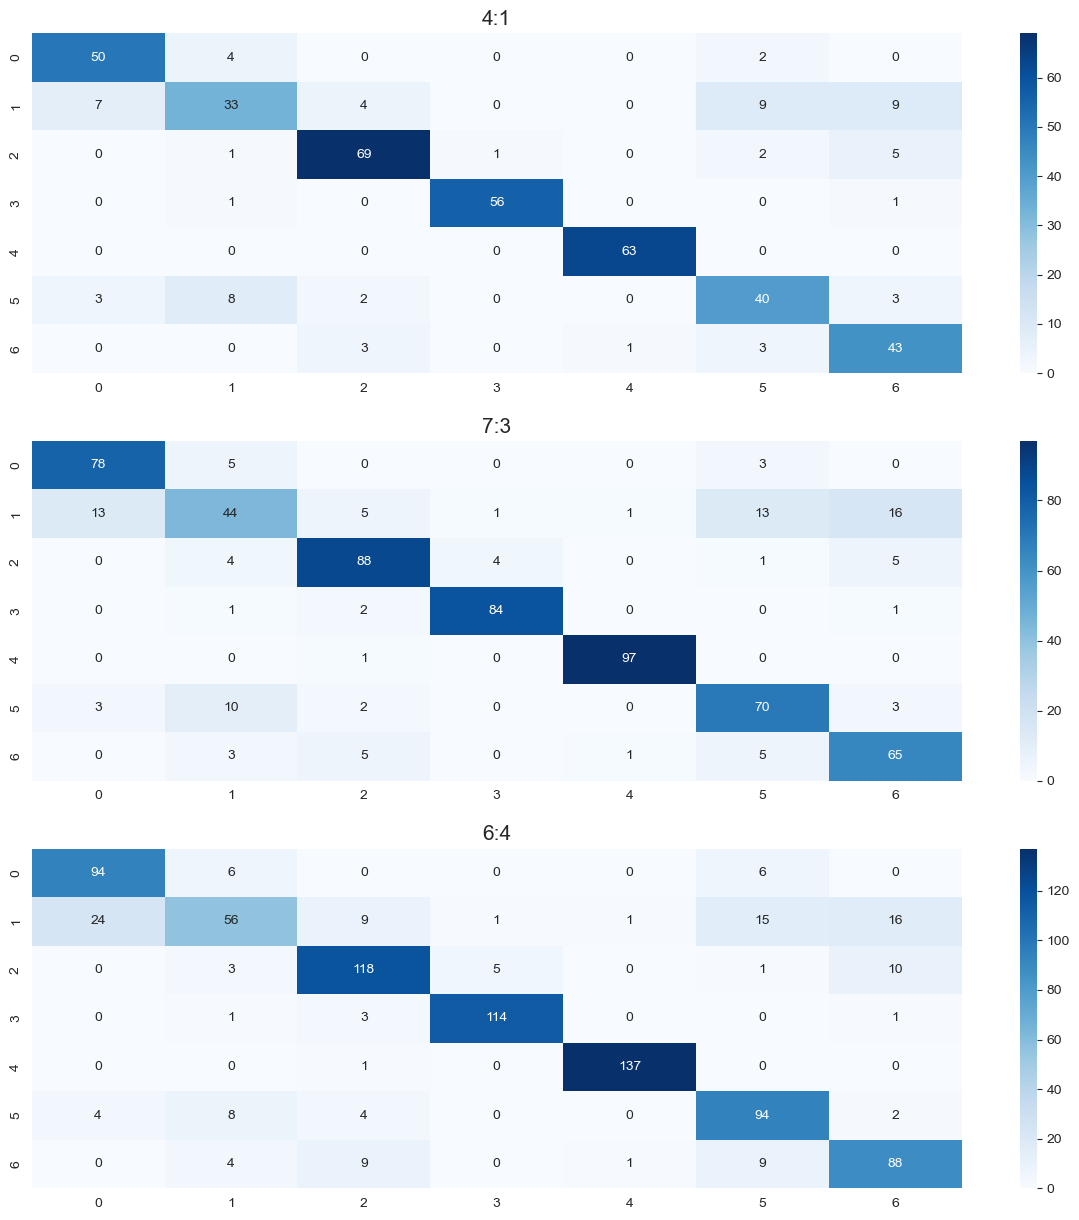

In [13]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

my_clf = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# 4:1
my_clf.fit(X_train_4_1, y_train_4_1)
y_pred_4_1 = my_clf.predict(X_test_4_1)

# 7:3
my_clf.fit(X_train_7_3, y_train_7_3)
y_pred_7_3 = my_clf.predict(X_test_7_3)

# 6:4
my_clf.fit(X_train_6_4, y_train_6_4)
y_pred_6_4 = my_clf.predict(X_test_6_4)

#acuracy
print(f"Accuracy 4:1: {accuracy_score(y_test_4_1, y_pred_4_1)}")
print(f"Accuracy 7:3: {accuracy_score(y_test_7_3, y_pred_7_3)}")
print(f"Accuracy 6:4: {accuracy_score(y_test_6_4, y_pred_6_4)}")

#classification report
print("Classification report 4:1")
print(classification_report(y_test_4_1, y_pred_4_1))
print("Classification report 7:3")
print(classification_report(y_test_7_3, y_pred_7_3))
print("Classification report 6:4")
print(classification_report(y_test_6_4, y_pred_6_4))

# Trực quan hóa confusion matrix của cả 3 trường hợp
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
sns.heatmap(confusion_matrix(y_test_4_1, y_pred_4_1), annot=True, fmt='d', cmap='Blues')
plt.title('4:1', fontsize=15)
plt.subplot(3, 1, 2)
sns.heatmap(confusion_matrix(y_test_7_3, y_pred_7_3), annot=True, fmt='d', cmap='Blues')
plt.title('7:3', fontsize=15)
plt.subplot(3, 1, 3)
sns.heatmap(confusion_matrix(y_test_6_4, y_pred_6_4), annot=True, fmt='d', cmap='Blues')
plt.title('6:4', fontsize=15)
plt.show()

### Thực hiện trên tệp dữ liệu đã giảm chiều với PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)

X_scale = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scale)

X_train_4_1_pca = pca.fit_transform(X_train_4_1)
X_test_4_1_pca = pca.transform(X_test_4_1)

X_train_7_3_pca = pca.fit_transform(X_train_7_3)
X_test_7_3_pca = pca.transform(X_test_7_3)

X_train_6_4_pca = pca.fit_transform(X_train_6_4)
X_test_6_4_pca = pca.transform(X_test_6_4)


In [18]:
my_clf = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# 4:1
my_clf.fit(X_train_4_1_pca, y_train_4_1)
y_pred_4_1 = my_clf.predict(X_test_4_1_pca)

# 7:3
my_clf.fit(X_train_7_3_pca, y_train_7_3)
y_pred_7_3 = my_clf.predict(X_test_7_3_pca)

# 6:4
my_clf.fit(X_train_6_4_pca, y_train_6_4)
y_pred_6_4 = my_clf.predict(X_test_6_4_pca)

#acuracy
print(f"Accuracy 4:1: {accuracy_score(y_test_4_1, y_pred_4_1)}")
print(f"Accuracy 7:3: {accuracy_score(y_test_7_3, y_pred_7_3)}")
print(f"Accuracy 6:4: {accuracy_score(y_test_6_4, y_pred_6_4)}")

Accuracy 4:1: 0.8226950354609929
Accuracy 7:3: 0.8028391167192429
Accuracy 6:4: 0.8011834319526627


[0.8015749828806209, 0.7867627693010026, 0.7832089617754991, 0.7761013467244922, 0.7678085438870647, 0.76602637262304, 0.7571348304742507, 0.7500307270907591, 0.74174670342212, 0.7310765016768211, 0.7269239548399558, 0.7216002668867312, 0.7204185907678261, 0.718049971028743, 0.7162677997647182, 0.7127139922392148, 0.7097483890225273, 0.7073780134496866, 0.703824205924183, 0.699675170754833]
K optimal value: 2, Accuracy: 0.8015749828806209


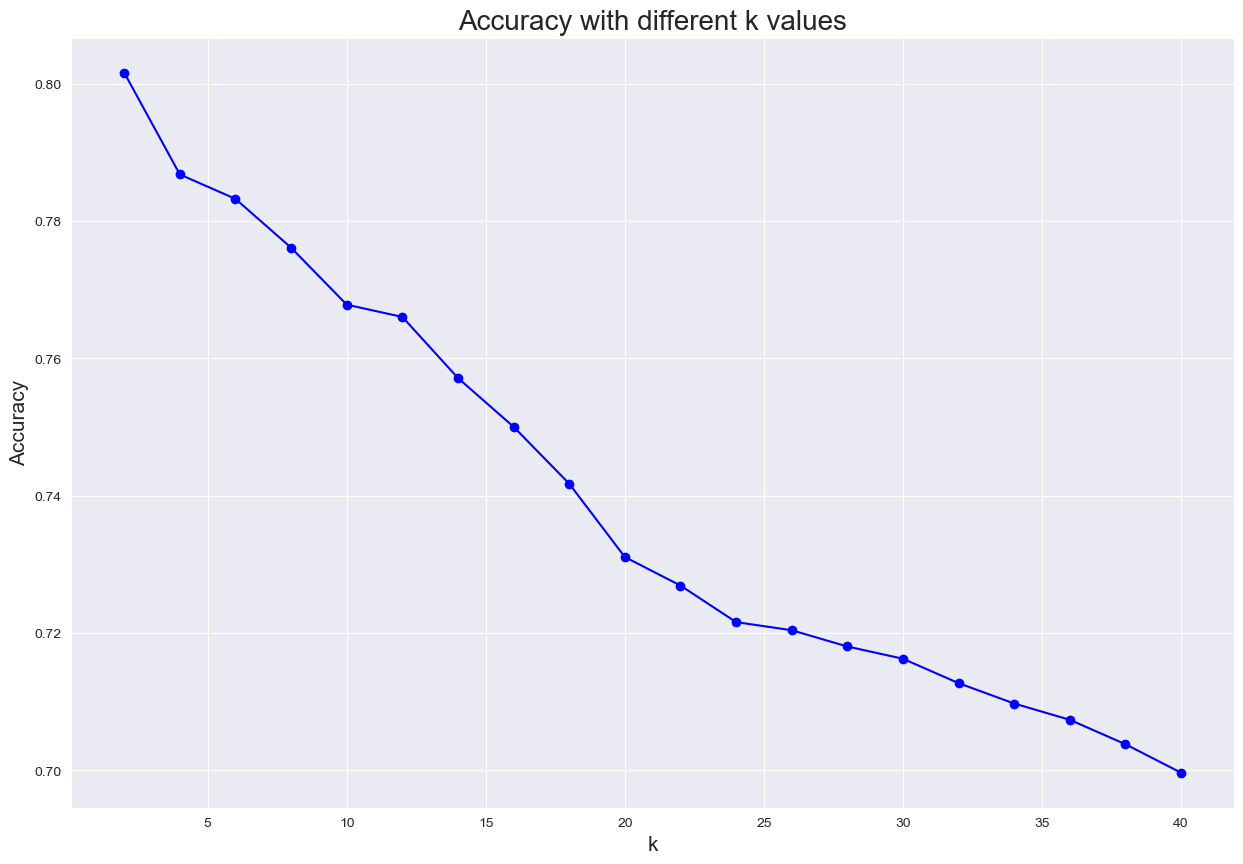

In [15]:
# Find k optimal value using k-fold cross validation
k_values = range(2, int(math.sqrt(len(X_train_4_1_pca))), 2)
kf = KFold(n_splits=5)
mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X_train_4_1_pca):
        X_train, X_test = X_pca[train_index], X_train_4_1_pca[test_index]
        y_train, y_test = y_train_4_1[train_index], y_train_4_1[test_index]

        my_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
        my_clf.fit(X_train, y_train)
        y_pred = my_clf.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracies.append(np.mean(accuracies))
    
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print(mean_accuracies)

plt.figure(figsize=(15, 10))
plt.title('Accuracy with different k values', fontsize=20)

plt.xlabel('k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')

print(f"K optimal value: {best_k}, Accuracy: {best_accuracy}")